# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
# вычисление Relu функции

def ReLU(x):
         return x  *  (x  >  0)


In [3]:
# тренировка нейронной сети
def train_nn(training_inputs, training_outputs, training_iterations):
    global synaptic_weights
    for iteration in range(training_iterations):
        # перекачивание данных через нейрон
        output = run_nn(training_inputs)

        # вычисление ошибки через обратное распространение back-propagation
        error = training_outputs - output
            
        # выполнение корректировки весов
        adjustments = np.dot(training_inputs.T, error * sigm_deriv(output))*0.1

        synaptic_weights += adjustments


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global synaptic_weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output

## Пример построения  двухслойной нейронной сети на numpy

In [4]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

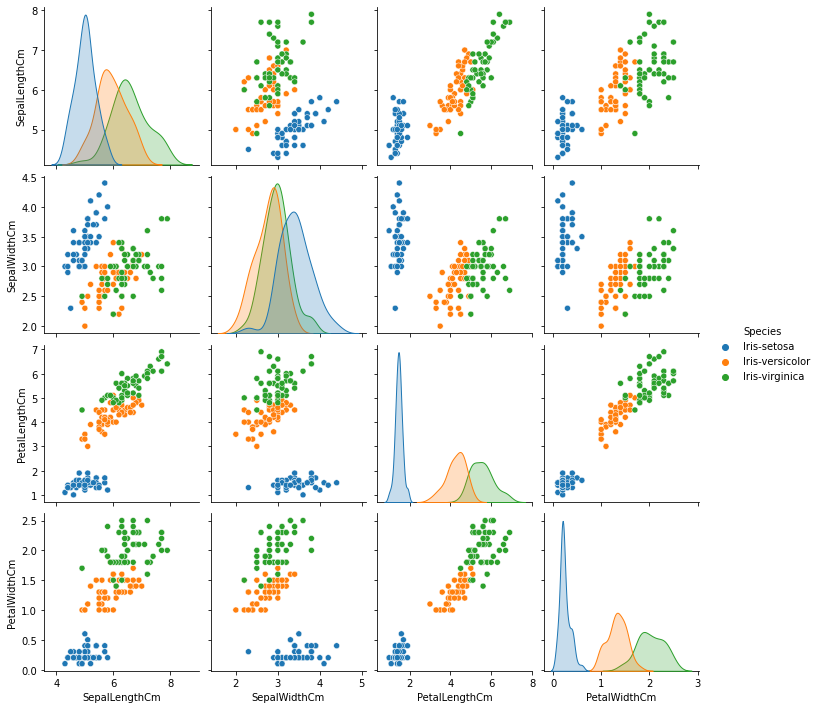

In [5]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [6]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

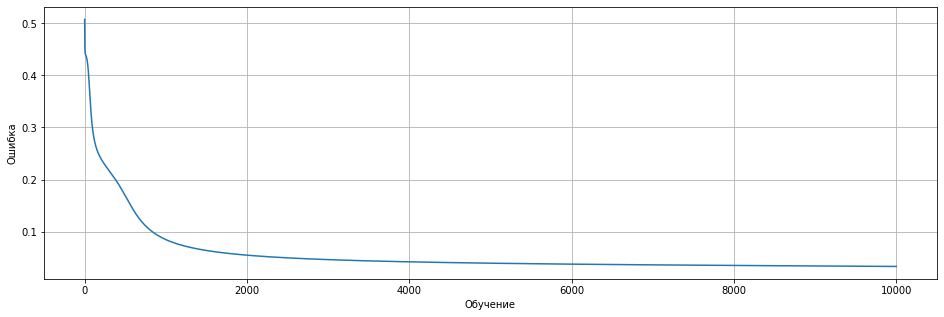

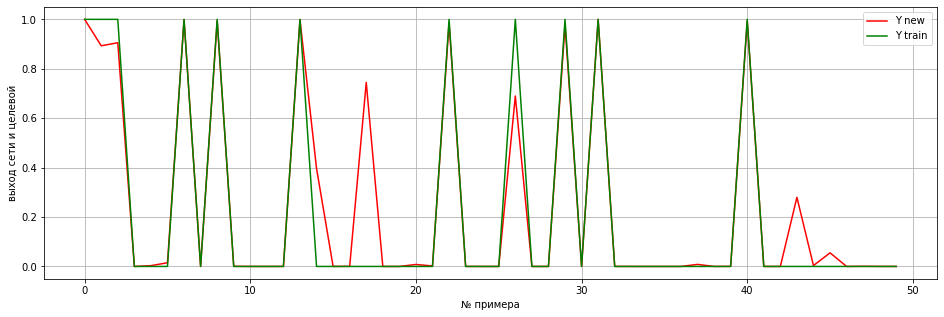

Аккуратность нейронной сети 96.68%


In [7]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.grid()
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



In [8]:
w1

array([[  2.47820002,  -5.65852996,  -3.04294321],
       [ -6.86002087,   3.92929469,   4.19776747],
       [  0.21719762, -12.95383013,   8.84454616],
       [ -4.80942662,  11.92863106, -17.42996656],
       [  4.78458463,  -5.46457474, -13.1179306 ]])

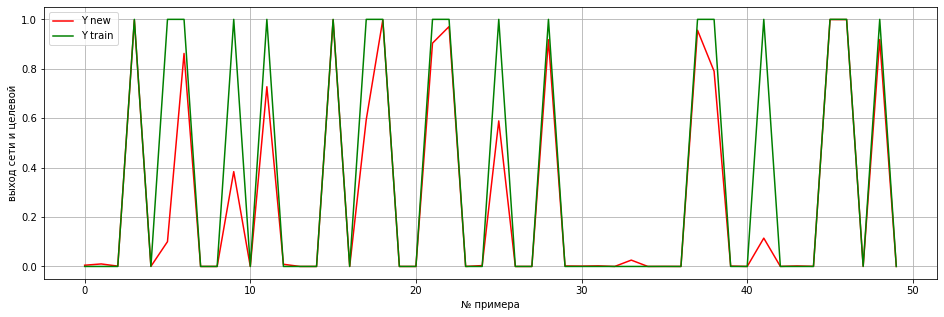

Аккуратность нейронной сети на тесте 93.88%


In [9]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.grid()
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

В этом уроке мы с вами рассматривали как сделать простые нейронные сети без использования специальных фреймворков и библиотек для этого. В следующих уроках мы с вами познакомимся как делать нейронные сети с помощью Keras и TensorFlow.

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).


In [10]:
def training_nn(input_data, true_labels, neuron_numb, learning_rate, n_epochs):
    
    
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = learning_rate

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(n_epochs):

        # прямое распространение(feed forward)
        layer0 = input_data
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = true_labels - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        
    return errors, layer2, w0, w1


In [11]:
def testing_nn(input_data, w0, w1, true_labels):
    # прямое распространение(feed forward)
    layer0_t = input_data
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = true_labels - layer2_t
    
    return layer2_error_t, layer2_t


In [12]:
def get_metrics(errors):
    error_t = np.mean(np.abs(errors))
    accuracy_t = (1 - error_t) * 100
    
    return accuracy_t


In [13]:
def errors_graph(errors):
    plt.figure(figsize = (16,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.grid()
    plt.show() 

def labels_graph(layer2, true_labels):
    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer2[:N,1], 'r',label = 'Y new')
    plt.plot(true_labels[:N,1],'g', label = 'Y true')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.grid()
    plt.show() 


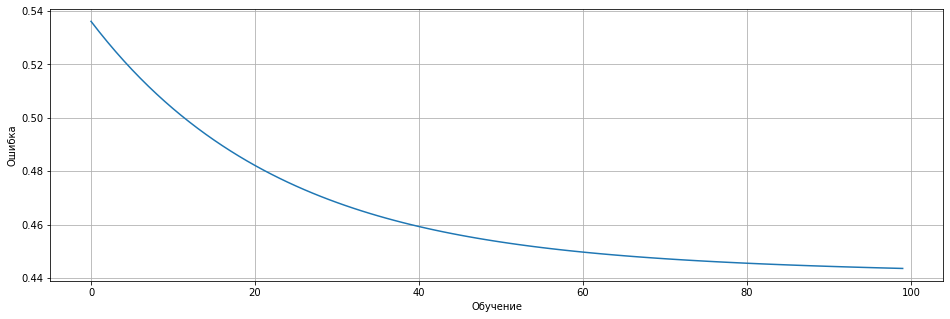

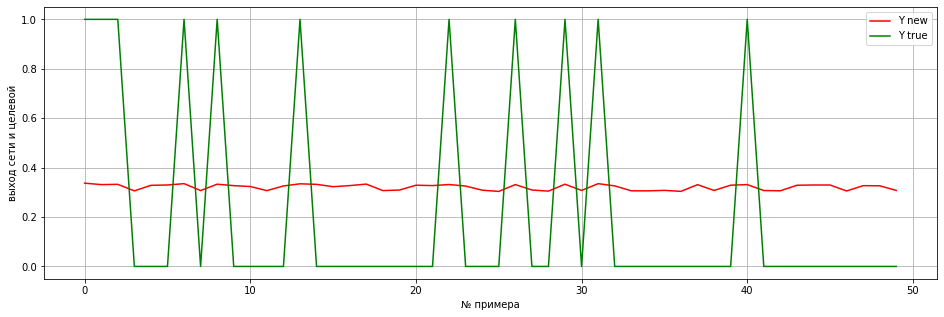

Аккуратность нейронной сети 53.56%


In [14]:
neuron_numb = 3
learning_rate = 0.01
n_epochs = 100
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)

accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")


- not enouph epochs for labeling, increasing number of epochs to 1000, then to 10000

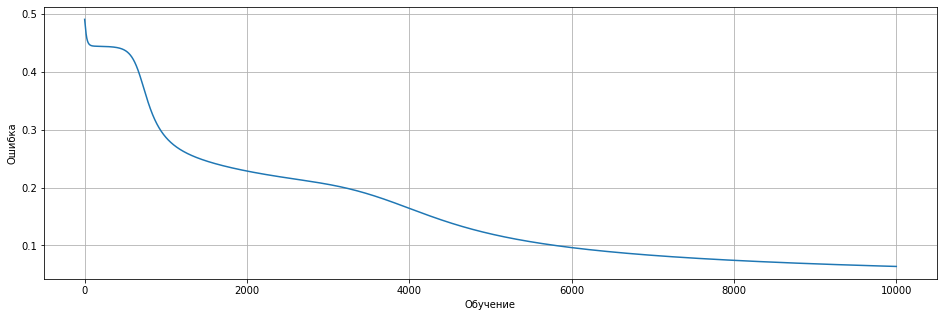

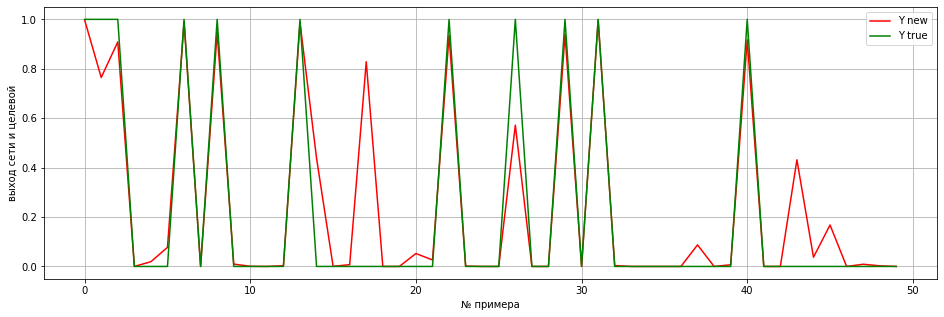

Аккуратность нейронной сети 83.92%


In [15]:
neuron_numb = 3
learning_rate = 0.01
n_epochs = 10000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")


Аккуратность нейронной сети 92.96%


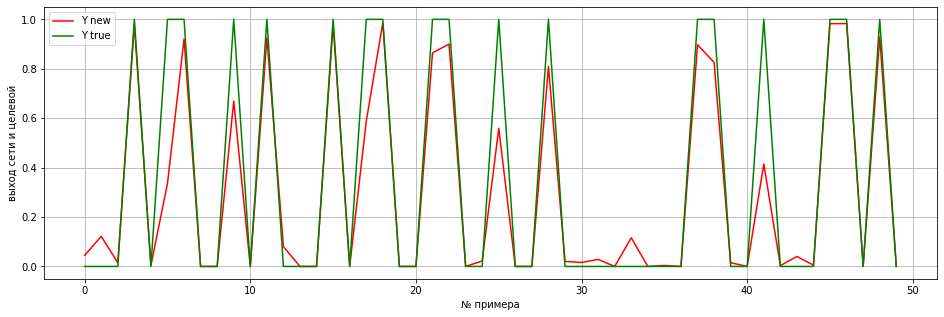

In [16]:
test_errors, layer2_t = testing_nn(X_test, w0, w1, y_test)
test_accuracy = get_metrics(test_errors)
print("Аккуратность нейронной сети " + str(round(test_accuracy,2)) + "%")
labels_graph(layer2_t, y_test)


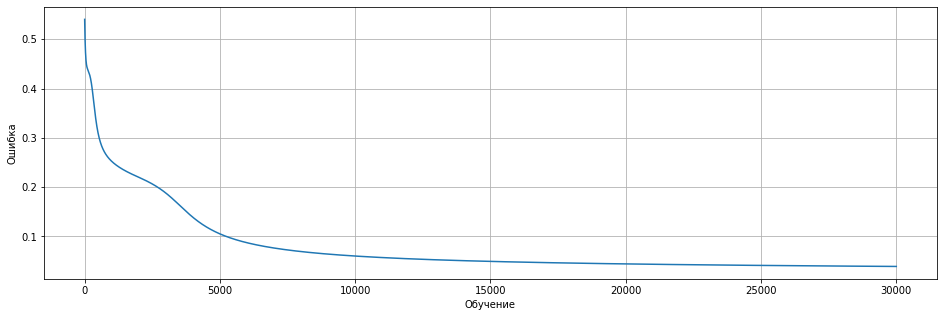

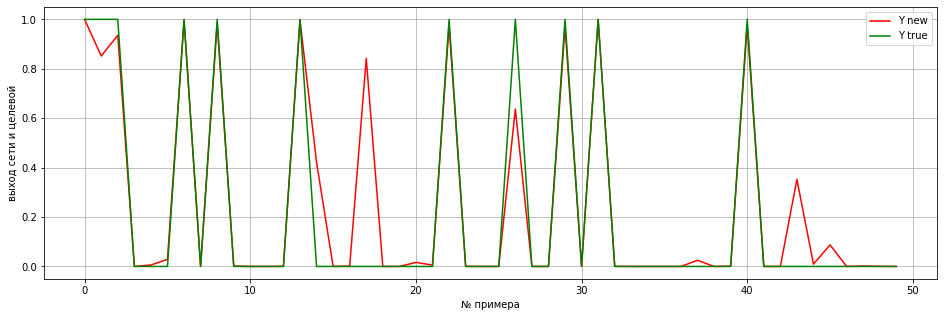

Аккуратность нейронной сети 92.15%


In [17]:
neuron_numb = 3
learning_rate = 0.01
n_epochs = 30000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

In [18]:
# leaving 5000 epochs but increasing learning rate

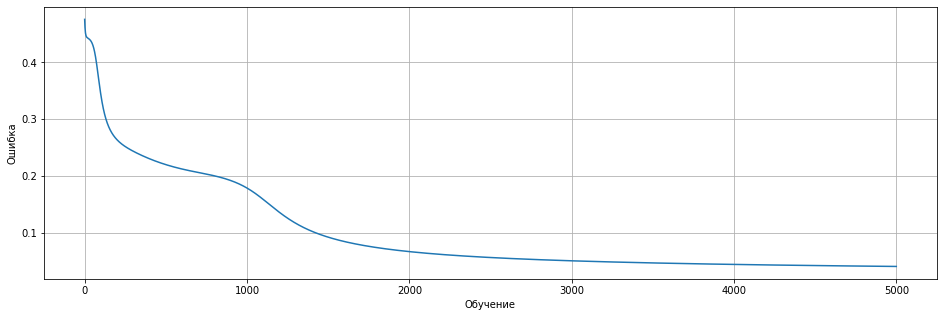

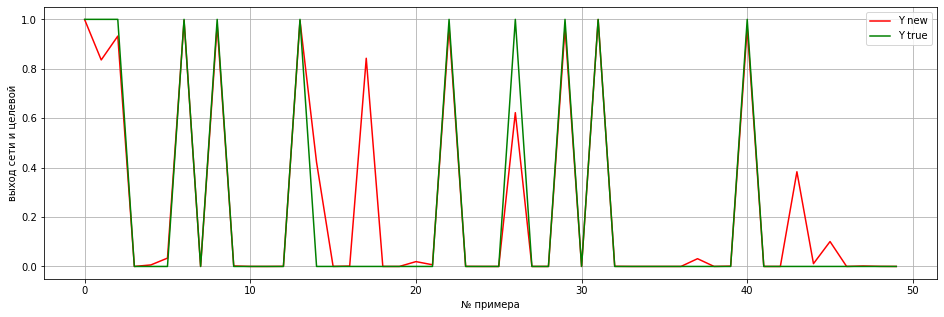

Аккуратность нейронной сети 90.05%


In [19]:
neuron_numb = 3
learning_rate = 0.05
n_epochs = 5000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

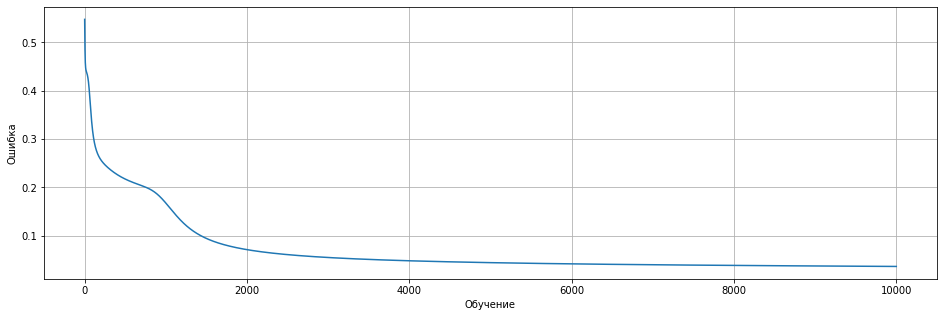

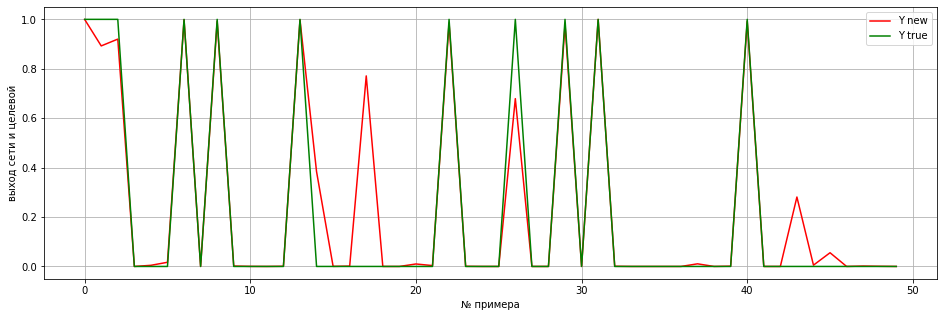

Аккуратность нейронной сети 93.0%


In [20]:
neuron_numb = 3
learning_rate = 0.05
n_epochs = 10000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Аккуратность нейронной сети 93.96%


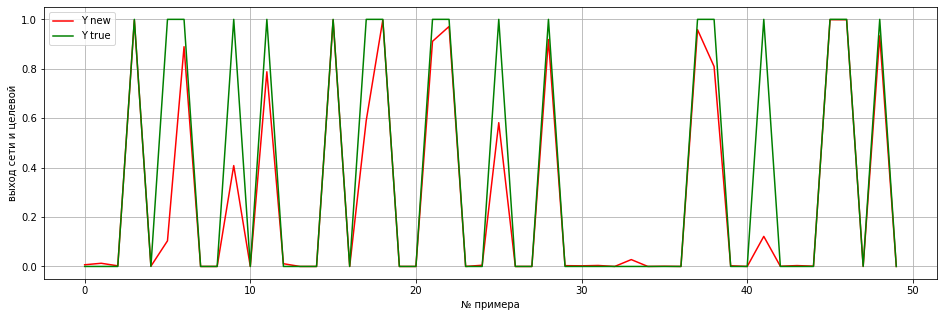

In [21]:
test_errors, layer2_t = testing_nn(X_test, w0, w1, y_test)
test_accuracy = get_metrics(test_errors)
print("Аккуратность нейронной сети " + str(round(test_accuracy,2)) + "%")

labels_graph(layer2_t, y_test)

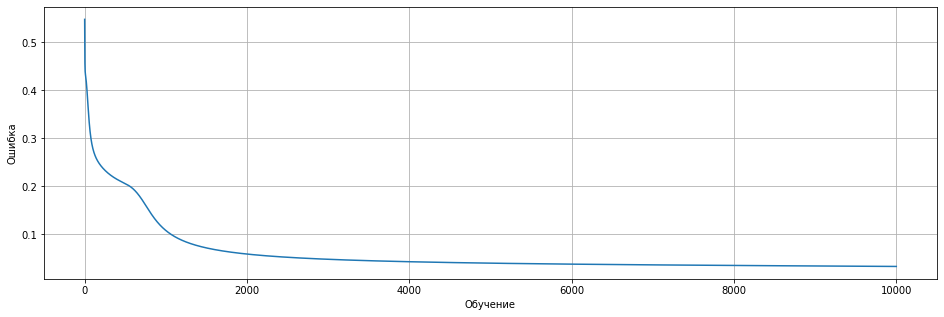

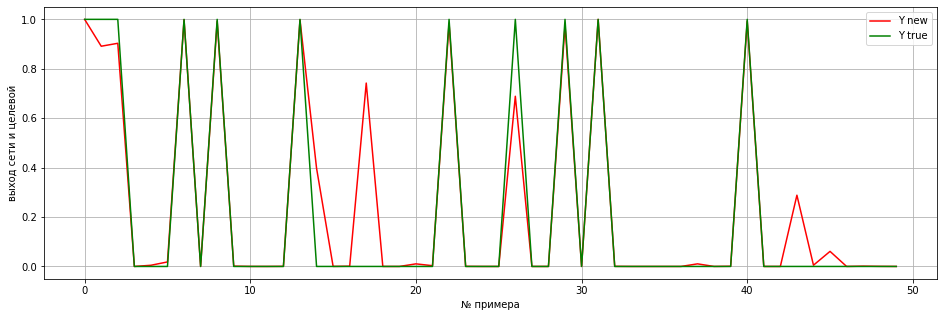

Аккуратность нейронной сети 93.95%


In [22]:
neuron_numb = 7
learning_rate = 0.05
n_epochs = 10000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Аккуратность нейронной сети 93.83%


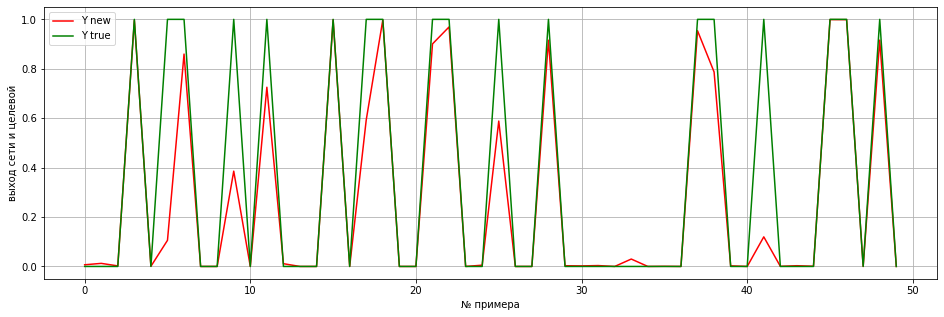

In [23]:
test_errors, layer2_t = testing_nn(X_test, w0, w1, y_test)
test_accuracy = get_metrics(test_errors)
print("Аккуратность нейронной сети " + str(round(test_accuracy,2)) + "%")

labels_graph(layer2_t, y_test)

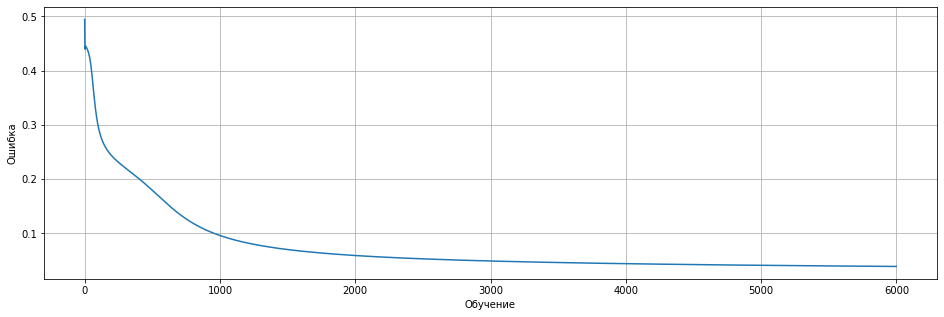

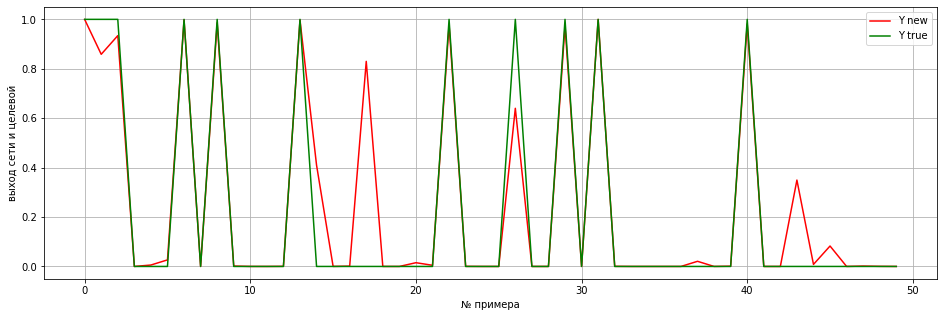

Аккуратность нейронной сети 92.51%


In [24]:
neuron_numb = 10
learning_rate = 0.05
n_epochs = 6000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Аккуратность нейронной сети 94.33%


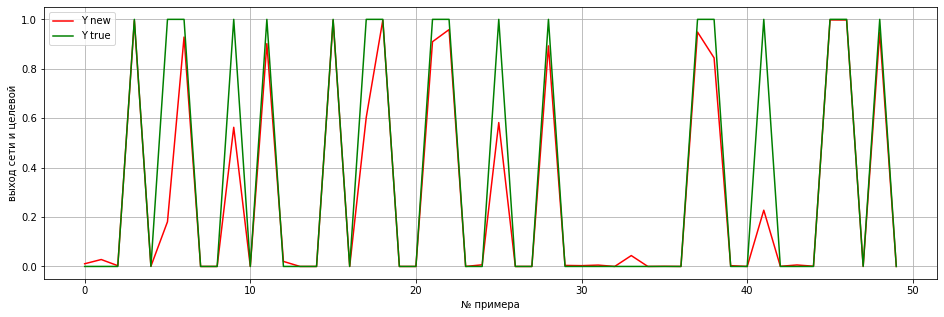

In [25]:
test_errors, layer2_t = testing_nn(X_test, w0, w1, y_test)
test_accuracy = get_metrics(test_errors)
print("Аккуратность нейронной сети " + str(round(test_accuracy,2)) + "%")

labels_graph(layer2_t, y_test)

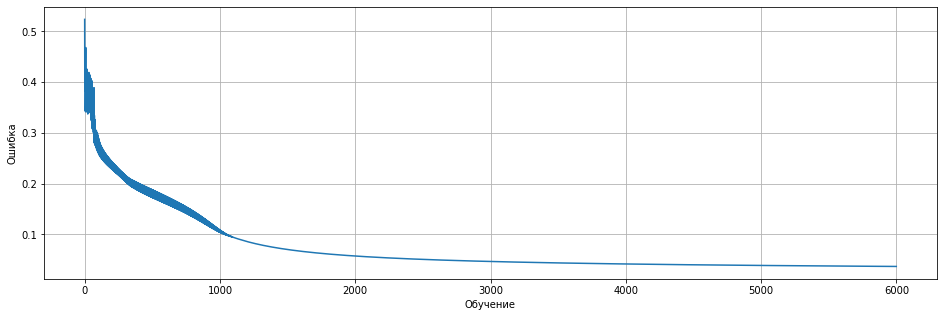

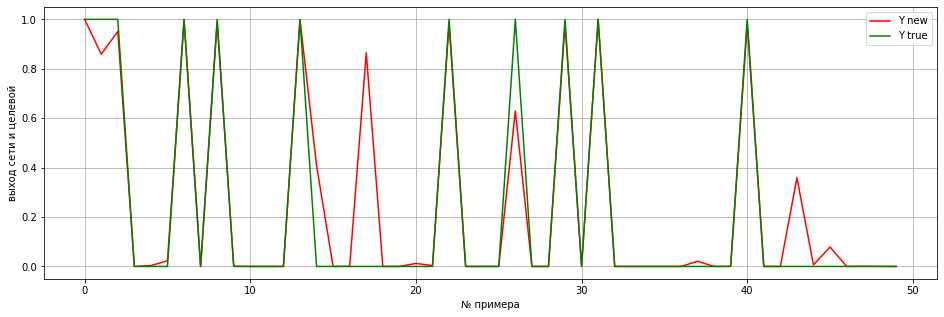

Аккуратность нейронной сети 92.63%


In [26]:
neuron_numb = 50
learning_rate = 0.05
n_epochs = 6000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Аккуратность нейронной сети 94.67%


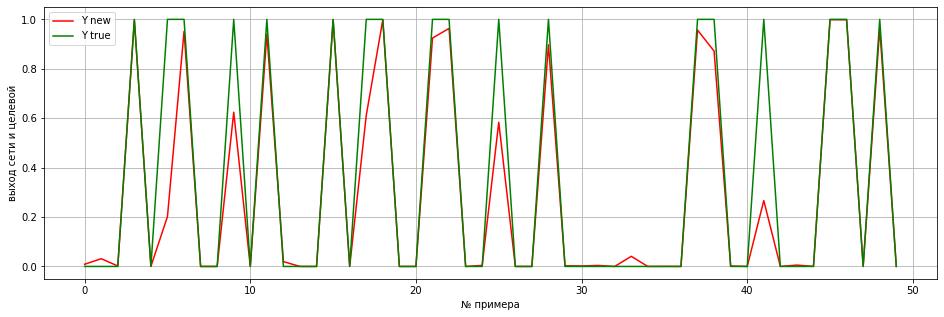

In [27]:
test_errors, layer2_t = testing_nn(X_test, w0, w1, y_test)
test_accuracy = get_metrics(test_errors)
print("Аккуратность нейронной сети " + str(round(test_accuracy,2)) + "%")

labels_graph(layer2_t, y_test)

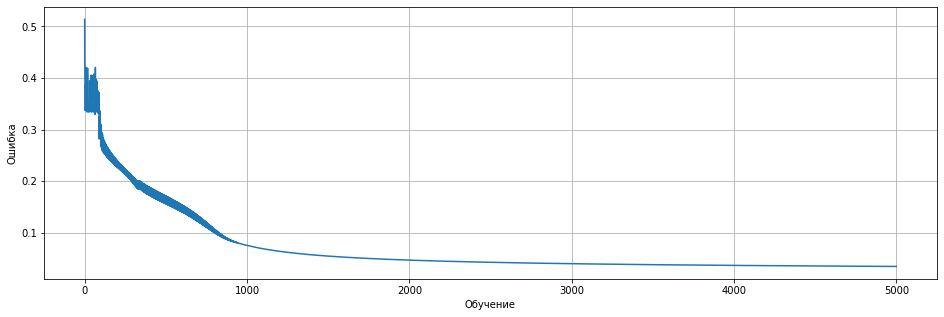

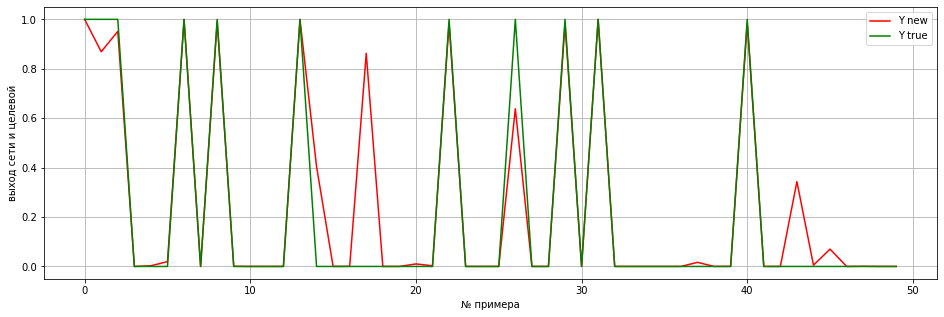

Аккуратность нейронной сети 92.97%


In [28]:
neuron_numb = 50
learning_rate = 0.07
n_epochs = 5000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Аккуратность нейронной сети 94.75%


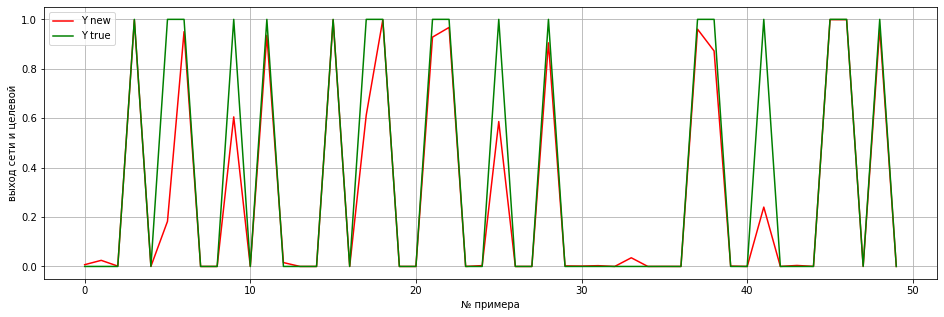

In [29]:
test_errors, layer2_t = testing_nn(X_test, w0, w1, y_test)
test_accuracy = get_metrics(test_errors)
print("Аккуратность нейронной сети " + str(round(test_accuracy,2)) + "%")

labels_graph(layer2_t, y_test)

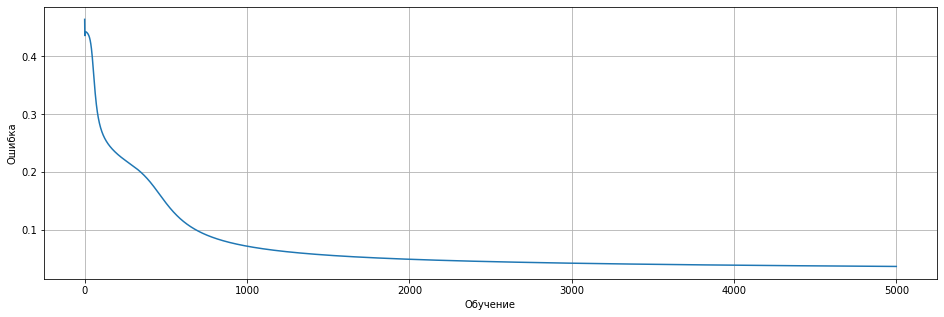

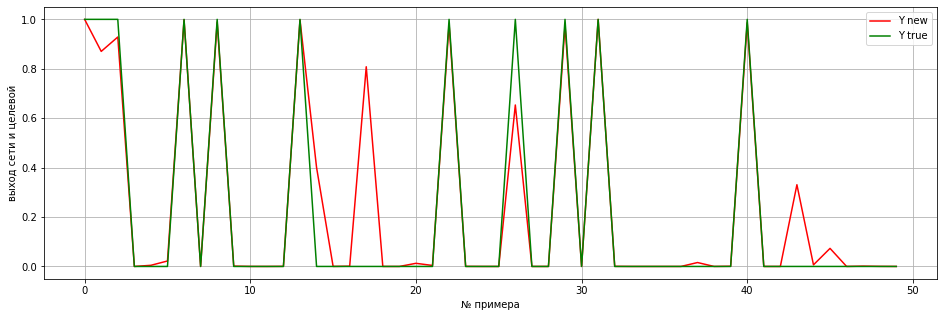

Аккуратность нейронной сети 92.95%


In [30]:
neuron_numb = 5
learning_rate = 0.07
n_epochs = 5000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Аккуратность нейронной сети 94.4%


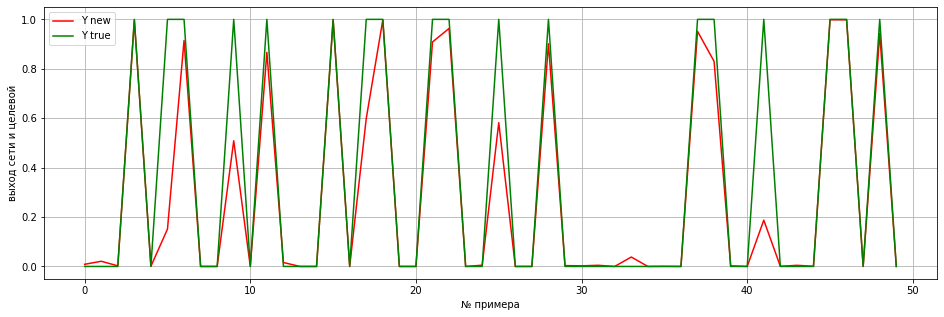

In [31]:
test_errors, layer2_t = testing_nn(X_test, w0, w1, y_test)
test_accuracy = get_metrics(test_errors)
print("Аккуратность нейронной сети " + str(round(test_accuracy,2)) + "%")

labels_graph(layer2_t, y_test)

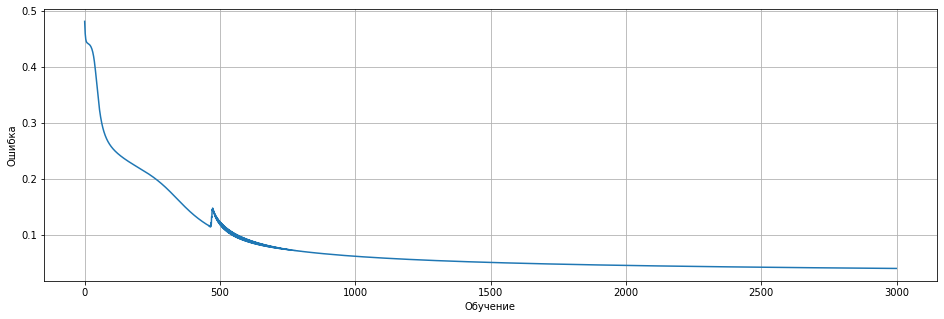

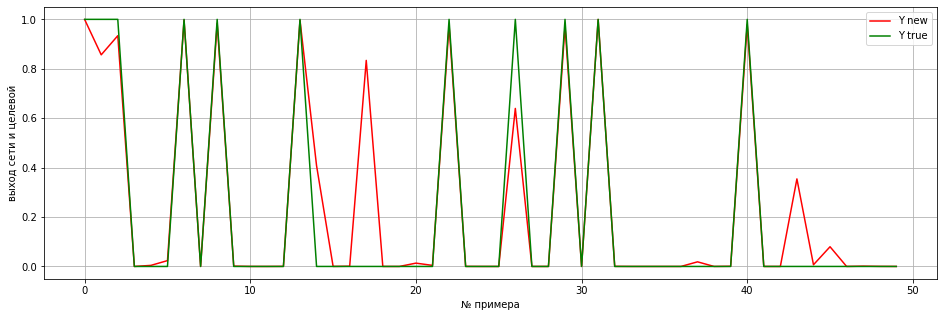

Аккуратность нейронной сети 91.93%


In [32]:
neuron_numb = 3
learning_rate = 0.1
n_epochs = 3000
errors, layer2, w0, w1 = training_nn(X_train, y_train, neuron_numb, learning_rate, n_epochs)
errors_graph(errors)
labels_graph(layer2, y_train)
accuracy = get_metrics(errors)
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Аккуратность нейронной сети 94.53%


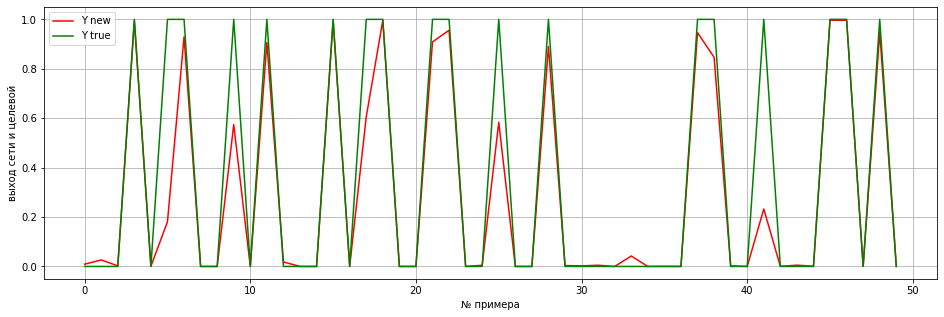

In [33]:
test_errors, layer2_t = testing_nn(X_test, w0, w1, y_test)
test_accuracy = get_metrics(test_errors)
print("Аккуратность нейронной сети " + str(round(test_accuracy,2)) + "%")

labels_graph(layer2_t, y_test)

2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

- it seems that on such small amount of data using more than 3 neurons doesn't improve results on test data
- balancing number of epochs and learning rate was useful to trace the dinamics but in our case resource limit is not an issue
- i'd try more layers to improve prediction